In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone

In [2]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
categorical_cols = ['Sex', 'BP', 'Cholesterol', 'Drug']
labels_encoders = {col: LabelEncoder().fit(df[col].unique()) for col in categorical_cols}
target_labels = df[categorical_cols[-1]].unique()

In [5]:
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = labels_encoders[col].transform(df_encoded[col])
# End For
df_encoded

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C894F3D48>,
      dtype=object)

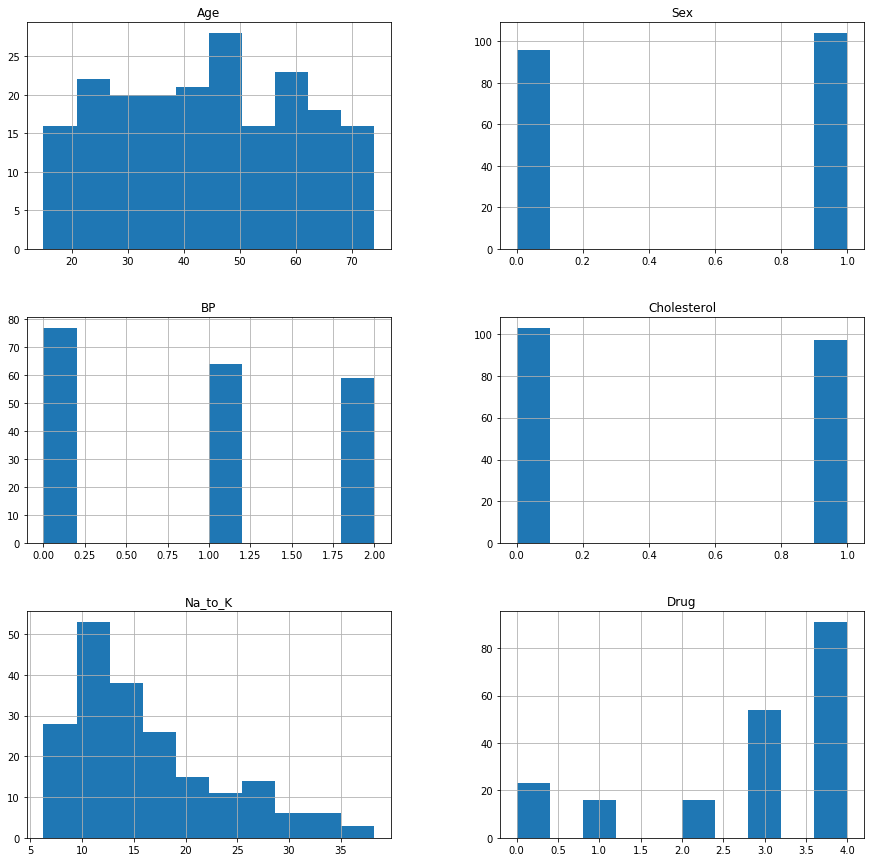

In [6]:
df_encoded.hist(figsize=(15, 15))

In [7]:
X, y = df_encoded.iloc[:, :-1].values, df_encoded.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
scores = cross_val_score(clone(model), X, y, cv=10)
print(f'Cross Validation Results: {scores * 100} %')
print(f'Avg Accuracy: { scores.mean() * 100 } %')

Cross Validation Results: [100. 100. 100. 100. 100. 100. 100.  95.  95. 100.] %
Avg Accuracy: 99.0 %


Accuracy: 100.0 %
Classification Report: 
               precision    recall  f1-score   support

       drugY       1.00      1.00      1.00         7
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00         6
       drugA       1.00      1.00      1.00        18
       drugB       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



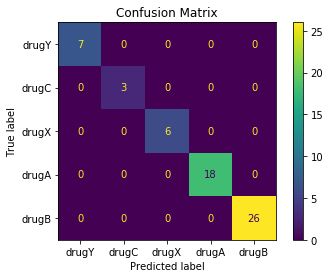

In [10]:
y_predict = model.fit(X_train, y_train).predict(X_test)
print(f'Accuracy: {accuracy_score(y_predict, y_test) * 100} %')
print(f'Classification Report: \n {classification_report(y_predict, y_test, target_names = target_labels)}')
plot_confusion_matrix(model, X_test, y_test, display_labels = target_labels)
plt.title('Confusion Matrix')
plt.show()

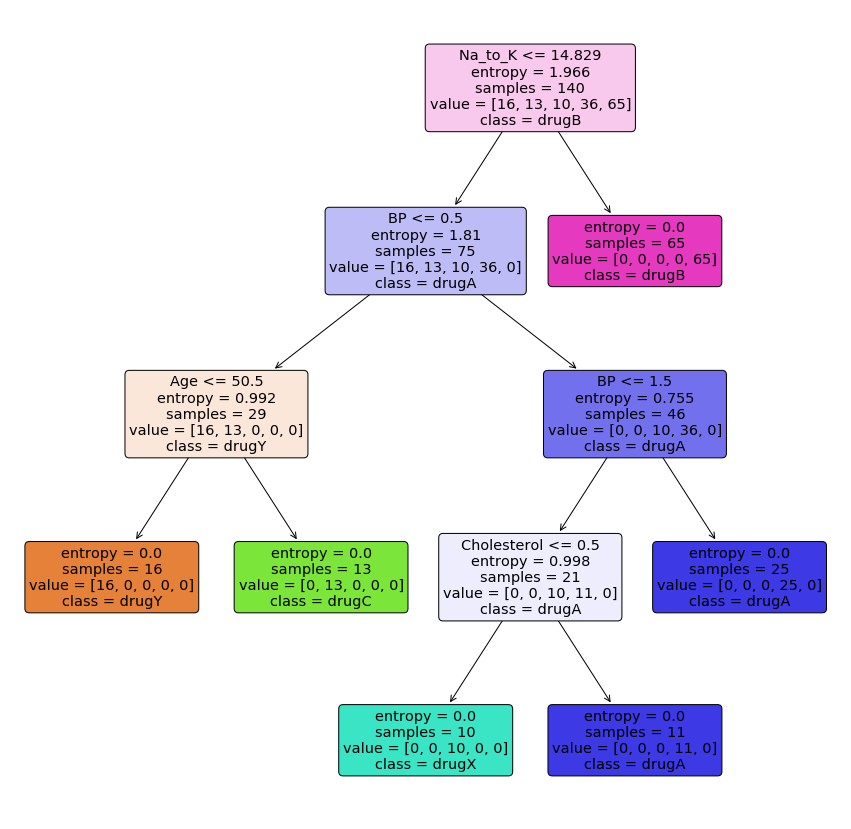

In [11]:
plt.figure(figsize=(15, 15))
plot_tree(model, feature_names = df.columns[:-1], class_names = target_labels, rounded=True, filled = True)
plt.show()